In [3]:
import pandas as pd
import pytz, datetime
import pytz
from pytz import timezone
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


https://services.swpc.noaa.gov/products/solar-wind/
Leyendo el realtime, falta ajusta para leer del webservice y obtener phi
https://www.ngdc.noaa.gov/dscovr/next/

In [4]:
path='dscovr/'
filenamePy=path+'mag-7-day.json'


In [30]:
dscovr = pd.read_json (filenamePy, lines=False)


In [31]:
colunames=dscovr.iloc[0].values
dscovr= dscovr.iloc[1:]
dscovr.set_axis(colunames, axis=1, inplace=True)

In [32]:
dscovr.head()

,time_tag,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt
1,2021-04-26 12:40:00.000,3.78,-0.89,-0.17,346.83,-2.47,3.91
2,2021-04-26 12:41:00.000,3.59,-0.55,0.08,351.32,1.19,3.65
3,2021-04-26 12:42:00.000,3.38,-0.39,0.97,353.39,15.96,3.53
4,2021-04-26 12:43:00.000,3.82,-0.31,0.21,355.43,3.14,3.86
5,2021-04-26 12:44:00.000,3.87,-0.98,-0.46,345.84,-6.65,4.11


In [37]:
dscovr['datetime']=pd.to_datetime(dscovr.time_tag,format='%Y-%m-%d %H:%M:%S',utc=True)
dscovr.set_index(['datetime'],drop=True, inplace=True)
#py.tail()

In [44]:
dscovr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10075 entries, 2021-04-26 12:40:00+00:00 to 2021-05-03 12:36:00+00:00
Data columns (total 7 columns):
time_tag    10075 non-null object
bx_gsm      10075 non-null object
by_gsm      10075 non-null object
bz_gsm      10075 non-null object
lon_gsm     10075 non-null object
lat_gsm     10075 non-null object
bt          10075 non-null object
dtypes: object(7)
memory usage: 629.7+ KB


10075

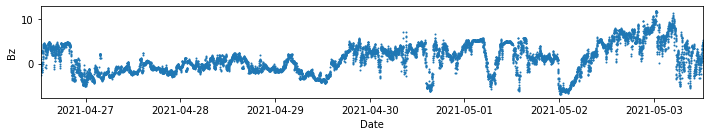

In [47]:
fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
dscovr['bz_gsm'].astype(float).plot(subplots=True,marker='.', markersize=2, linestyle='None', ax=axes)
axes.set_ylabel('Bz')
axes.set_xlabel('Date')
plt.tight_layout()
#plt.savefig('pngs/SerieCrudaContaje.png')

